In [2]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # # of words to consider as features
maxlen = 50 # maximum length of the feature words (gets truncated after this value)

# load the data as lists of integer
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# this will turn the list of integers into 1 2D integer sensor of shape
# as in (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [4]:
x_train[0]
x_test[0]



array([ 394,  354,    4,  123,    9, 1035, 1035, 1035,   10,   10,   13,
         92,  124,   89,  488, 7944,  100,   28, 1668,   14,   31,   23,
         27, 7479,   29,  220,  468,    8,  124,   14,  286,  170,    8,
        157,   46,    5,   27,  239,   16,  179,    2,   38,   32,   25,
       7944,  451,  202,   14,    6,  717])

In [27]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# Embedding layer is defined as the 1st hidden layer of a network taking 3 inputs
# input_dim= size of the vocabulary in the text data
# output_dim= dimension of dense embedding. size of the vector space where words will be embedded
# input_length= size of input sequence
# Below we define an Embedding layer with a vocabulary of 10,000 integer encoded words
# from 0, 9999, a vector space of 8 dim where input documents that have 20 words each
num_layer = 16
model.add(Embedding(max_features, num_layer, input_length=maxlen))
# Flattens the 3D (samples, maxlen, 8) -> 2D (samples, maxlen * 8) 
model.add(Flatten())
# Adding classifier
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=5, batch_size=12, validation_data=(x_test, y_test))


'''
remarks:
having the validation accuracy above 75% given looking at only 20 words seems to be quite good. Note that merely
flattening the embedded sequences and training a single "Dense" layer on top leads to a model that treats each woord in th einut sequence separately,
without considering inter-word relationships and structure sentence.
So, it would be much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account
each sequences to learn features that take into account each sequence as a whole.

val_loss: 0.5617 - val_acc: 0.7382
0.87 (10,000, 250, 32, e5, sigmoid) relu=85, tanh=82

'''


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 50, 16)            160000    
_________________________________________________________________
flatten_13 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 801       
Total params: 160,801
Trainable params: 160,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
2084/2084 [==============================] - 6s 3ms/step - loss: 0.5398 - acc: 0.7282 - val_loss: 0.4135 - val_acc: 0.8102
Epoch 2/5
2084/2084 [==============================] - 7s 3ms/step - loss: 0.3697 - acc: 0.8368 - val_loss: 0.3908 - val_acc: 0.8235
Epoch 3/5
2084/2084 [==============================] - 9s 4ms/step - loss: 0.3233 - acc: 0.8610 - val_loss: 0.3

'\nremarks:\nhaving the validation accuracy above 75% given looking at only 20 words seems to be quite good. Note that merely\nflattening the embedded sequences and training a single "Dense" layer on top leads to a model that treats each woord in th einut sequence separately,\nwithout considering inter-word relationships and structure sentence.\nSo, it would be much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account\neach sequences to learn features that take into account each sequence as a whole.\n\nval_loss: 0.5617 - val_acc: 0.7382\n0.87 (10,000, 250, 32, e5, sigmoid) relu=85, tanh=82\n\n'

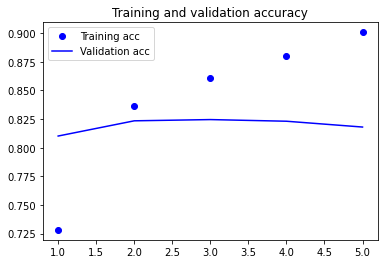

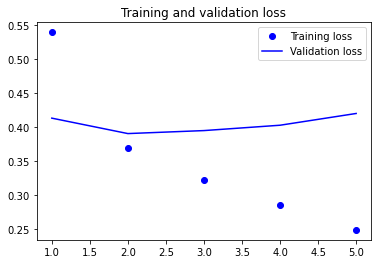

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()